## Myers-Briggs Test Results & Tweets

This dataset consists of a user's Myers-Briggs [personality test type](http://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/) and their last 50 Tweets.  This data could be used to analyze the text associated with each test result and also could build a model to predict personality type by Tweets.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/Desktop/mbti_1.csv')

In [3]:
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


In [11]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head(20)

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.290000
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.475600
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.690000
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.832400
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.457600
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,29.82,97.720000
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",26.58,151.366400
7,INTJ,'I tend to build up a collection of things on ...,24.46,174.766400
8,INFJ,"I'm not sure, that's a good question. The dist...",14.76,207.112400
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,24.66,145.670400


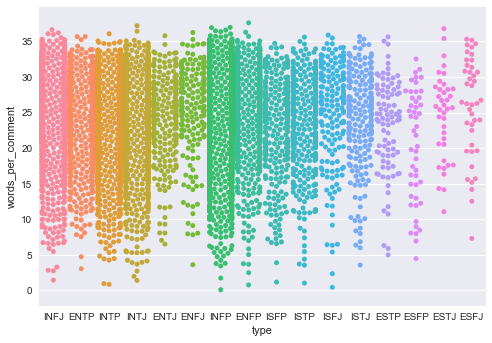

In [6]:
sns.swarmplot("type", "words_per_comment", data=df)
plt.show()